In [336]:
import pandas as pd
import numpy as np
from statsmodels.tsa.filters.hp_filter import hpfilter
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
import seaborn as sns
import os

In [337]:
days = 250

Date
2018-01-02     21.368668
2018-01-03     21.150000
2018-01-04     20.974667
2018-01-05     21.105333
2018-01-08     22.427334
                 ...    
2022-09-26    276.010010
2022-09-27    282.940002
2022-09-28    287.809998
2022-09-29    268.209991
2022-09-30    265.250000
Name: Close, Length: 1196, dtype: float64
Date
2018-01-02     22.587826
2018-01-03     22.558063
2018-01-04     22.528299
2018-01-05     22.498531
2018-01-08     22.468756
                 ...    
2022-09-26    283.982641
2022-09-27    284.369888
2022-09-28    284.757044
2022-09-29    285.144142
2022-09-30    285.531221
Name: Close_trend, Length: 1196, dtype: float64


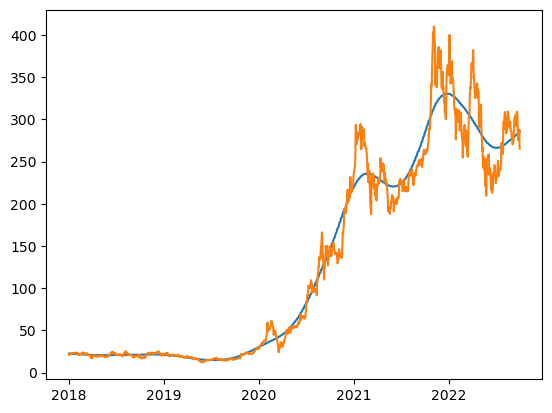

C:\Users\18hli\AppData\Local\Temp\ipykernel_44684\1581532443.py:22: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data_reshape = pd.concat([data['Close'].T.shift(i).to_frame().stack(dropna=False) for i in range(days) ], 1).dropna()


In [522]:

def produceHP(ticker):
    ticker = "\\Data\\{}".format(ticker) + ".csv"
    dir = os.getcwd() + ticker
    data = pd.read_csv(dir)
    data = data.set_index('Date')
    x = data.index
    x = [dt.datetime.strptime(d, '%Y-%m-%d') for d in x]
    price = data['Close']
    print(price)
    cycle, trend = sm.tsa.filters.hpfilter(price, 1000000)
    print(trend)
    y = trend
    plt.plot(x, y)
    y = price
    plt.plot(x, y)
    plt.show()
    return (data, trend)
data, trend = produceHP("TSLA")
# data, trend = produceHP("^TNX")


data_reshape = pd.concat([data['Close'].T.shift(i).to_frame().stack(dropna=False) for i in range(days) ], 1).dropna()
data_reshape.columns = pd.Index(range(days), name='timeLag')

In [523]:
from sklearn.model_selection import train_test_split
def split(data):
    X = data[np.arange(1, days)]
    y = data[0]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    return (X_train, X_test, y_train, y_test)

In [524]:
trend_data = pd.DataFrame()
# trend_data.columns = pd.Index(range(50), name='timeLag')
rows = []
for i in range(len(data_reshape)):
    row = data_reshape.iloc[i]
    cycle, trend = sm.tsa.filters.hpfilter(row[1:], 100000)
    rows.append(pd.concat([pd.Series(row[0]), trend], axis = 0))

trend_data = pd.DataFrame(rows)
trend_data.columns = pd.Index(range(days), name='timeLag')

In [583]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model._ridge import Ridge
from keras.metrics import mean_absolute_percentage_error, mean_squared_error

sum = 0.0
for i in range(100):
    X_train, X_test, y_train, y_test = split(data_reshape)
    model = KernelRidge(alpha = 1)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    sum += mean_squared_error(prediction, y_test)

print(sum)

tf.Tensor(18357.50730377874, shape=(), dtype=float64)


In [584]:
sum = 0.0
for i in range(100):
    X_train, X_test, y_train, y_test = split(trend_data)
    model = KernelRidge(alpha = 1)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    sum += mean_squared_error(prediction, y_test)

print(sum)

tf.Tensor(11387.449446001745, shape=(), dtype=float64)
